In [61]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from matplotlib.colors import to_rgba
import tensorflow as tf
import cv2

In [55]:
data_folder_path = Path(os.getcwd() + r"/Dataset/FoodSeg103/Images")


def load_images_combined(NUM_TRAIN_IMAGES, NUM_VAL_IMAGES):
    train_images_path = os.path.join(data_folder_path, r"img_dir/train")
    train_ann_path = os.path.join(data_folder_path, r"ann_dir/train")
    test_images_path = os.path.join(data_folder_path, r"img_dir/test")
    test_ann_path = os.path.join(data_folder_path, r"ann_dir/test")
    train_images_paths = sorted(os.listdir(train_images_path))
    train_ann_paths = sorted(os.listdir(train_ann_path))
    test_images_paths = sorted(os.listdir(test_images_path))
    test_ann_paths = sorted(os.listdir(test_ann_path))

    train_images = train_images_paths[:NUM_TRAIN_IMAGES]
    train_masks = train_ann_paths[:NUM_TRAIN_IMAGES]
    val_images = test_images_paths[:NUM_VAL_IMAGES]
    val_masks = test_ann_paths[:NUM_VAL_IMAGES]

    train_images = [str(os.path.join(train_images_path, img)) for img in train_images]
    train_masks = [str(os.path.join(train_ann_path, img)) for img in train_masks]
    val_images = [str(os.path.join(test_images_path, img)) for img in val_images]
    val_masks = [str(os.path.join(test_ann_path, img)) for img in val_masks]

    image_paths = train_images + val_images
    mask_paths = train_masks + val_masks
    image_paths.sort()
    mask_paths.sort()

    return image_paths, mask_paths


image_paths, mask_paths = load_images_combined(1000, 1000)

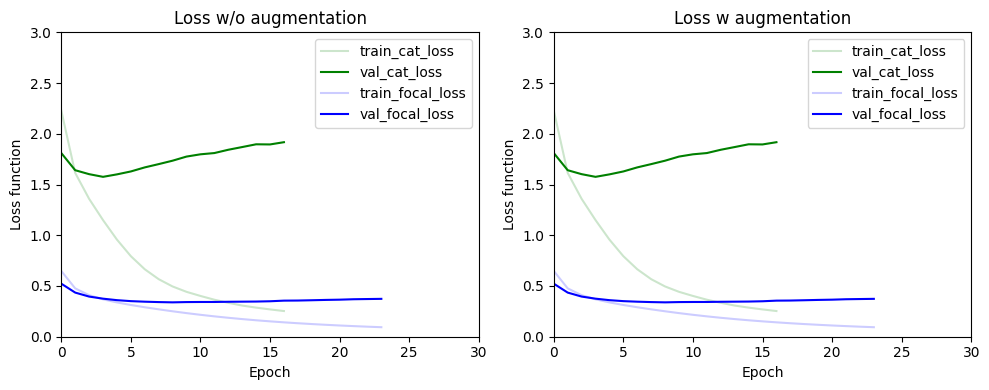

In [56]:
def load_model(path):
    path = Path('history/' + path)
    model = np.load(os.path.join(Path(os.getcwd()), path), allow_pickle='TRUE').item()
    return model


def plot_history_loss(history_categorical_wo_aug, history_focal_categorical_wo_aug, history_categorical_w_aug,
                      history_focal_categorical_w_aug):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    #first image
    axs[0].plot(history_categorical_wo_aug.history["loss"],
                color=to_rgba('green', alpha=0.2),
                label='train_cat_loss')
    axs[0].plot(history_categorical_wo_aug.history["val_loss"],
                color=to_rgba('green', alpha=1),
                label='val_cat_loss')
    axs[0].plot(history_focal_categorical_wo_aug.history["loss"],
                color=to_rgba('blue', alpha=0.2),
                label='train_focal_loss')
    axs[0].plot(history_focal_categorical_wo_aug.history["val_loss"],
                color=to_rgba('blue', alpha=1),
                label='val_focal_loss')
    axs[0].legend()
    axs[0].set_ylim(0, 3)
    axs[0].set_title('Loss w/o augmentation')
    axs[0].set_ylabel('Loss function')
    axs[0].set_xlabel("Epoch")

    #second image
    axs[1].plot(history_categorical_w_aug.history["loss"],
                color=to_rgba('green', alpha=0.2),
                label='train_cat_loss')
    axs[1].plot(history_categorical_w_aug.history["val_loss"],
                color=to_rgba('green', alpha=1),
                label='val_cat_loss')
    axs[1].plot(history_focal_categorical_w_aug.history["loss"],
                color=to_rgba('blue', alpha=0.2),
                label='train_focal_loss')
    axs[1].plot(history_focal_categorical_w_aug.history["val_loss"],
                color=to_rgba('blue', alpha=1),
                label='val_focal_loss')
    axs[1].legend()
    axs[1].set_ylim(0, 3)
    axs[1].set_title('Loss w augmentation')
    axs[1].set_ylabel('Loss function')
    axs[1].set_xlabel("Epoch")

    for ax in axs:
        ax.set_xlim(0, 30)
    plt.tight_layout()
    plt.show()


history_categorical_wo_aug = load_model('history_crossCategorical_noAug.npy')
history_focal_categorical_wo_aug = load_model('history_CategoricalFocalCrossentropy_noAug.npy')

plot_history_loss(
    history_categorical_wo_aug,
    history_focal_categorical_wo_aug,
    history_categorical_wo_aug,
    history_focal_categorical_wo_aug
                  )

In [57]:
class_labels = {0: 'background', 1: 'candy', 2: 'egg tart', 3: 'french fries', 4: 'chocolate', 5: 'biscuit',
                6: 'popcorn', 7: 'pudding', 8: 'ice cream', 9: 'cheese butter', 10: 'cake', 11: 'wine', 12: 'milkshake',
                13: 'coffee', 14: 'juice', 15: 'milk', 16: 'tea', 17: 'almond', 18: 'red beans', 19: 'cashew',
                20: 'dried cranberries', 21: 'soy', 22: 'walnut', 23: 'peanut', 24: 'egg', 25: 'apple', 26: 'date',
                27: 'apricot', 28: 'avocado', 29: 'banana', 30: 'strawberry', 31: 'cherry', 32: 'blueberry',
                33: 'raspberry', 34: 'mango', 35: 'olives', 36: 'peach', 37: 'lemon', 38: 'pear', 39: 'fig',
                40: 'pineapple', 41: 'grape', 42: 'kiwi', 43: 'melon', 44: 'orange', 45: 'watermelon', 46: 'steak',
                47: 'pork', 48: 'chicken duck', 49: 'sausage', 50: 'fried meat', 51: 'lamb', 52: 'sauce', 53: 'crab',
                54: 'fish', 55: 'shellfish', 56: 'shrimp', 57: 'soup', 58: 'bread', 59: 'corn', 60: 'hamburg',
                61: 'pizza', 62: ' hanamaki baozi', 63: 'wonton dumplings', 64: 'pasta', 65: 'noodles', 66: 'rice',
                67: 'pie', 68: 'tofu', 69: 'eggplant', 70: 'potato', 71: 'garlic', 72: 'cauliflower', 73: 'tomato',
                74: 'kelp', 75: 'seaweed', 76: 'spring onion', 77: 'rape', 78: 'ginger', 79: 'okra', 80: 'lettuce',
                81: 'pumpkin', 82: 'cucumber', 83: 'white radish', 84: 'carrot', 85: 'asparagus', 86: 'bamboo shoots',
                87: 'broccoli', 88: 'celery stick', 89: 'cilantro mint', 90: 'snow peas', 91: ' cabbage',
                92: 'bean sprouts', 93: 'onion', 94: 'pepper', 95: 'green beans', 96: 'French beans',
                97: 'king oyster mushroom', 98: 'shiitake', 99: 'enoki mushroom', 100: 'oyster mushroom',
                101: 'white button mushroom', 102: 'salad', 103: 'other ingredients'}

In [58]:
IMAGE_SIZE = 128


# image_paths is global var
# mask_paths is global var

def read_image(index):
    image = tf.io.read_file(image_paths[index])
    image = tf.image.decode_png(image, channels=3)
    image.set_shape([None, None, 3])
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = tf.keras.applications.resnet50.preprocess_input(image)
    processed_image = image[None, :, :, :]
    return processed_image


def read_mask(index):
    mask = tf.io.read_file(mask_paths[index])
    mask = tf.image.decode_png(mask, channels=1)
    mask.set_shape([None, None, 1])
    mask = tf.image.resize(images=mask, size=[IMAGE_SIZE, IMAGE_SIZE], method='nearest')
    return mask


def predict(model, index):
    processed_image = read_image(index)
    prediction = model.predict(processed_image)
    prediction = prediction.squeeze()
    return prediction


def read_image_raw(index):
    image = cv2.resize(cv2.cvtColor(cv2.imread(image_paths[index]),
                                    cv2.COLOR_BGR2RGB),
                       dsize=(IMAGE_SIZE, IMAGE_SIZE),
                       interpolation=cv2.INTER_CUBIC)
    return image


def plot_images_withLegends(image_number, model):
    colormap = plt.cm.get_cmap('viridis', len(class_labels))
    ##raw image
    image_raw = read_image_raw(image_number)

    # mask image
    mask = read_mask(image_number)

    image_prediction = predict(model, image_number)
    image_prediction = image_prediction.argmax(axis=-1)
    rgb_image = colormap(image_prediction)[:, :, :3]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image_raw, cmap='viridis')
    axes[0].axis('off')
    axes[0].set_title('Raw Image')

    axes[1].imshow(mask, cmap=colormap, vmin=0, vmax=len(class_labels))
    axes[1].axis('off')
    axes[1].set_title('Mask Image')

    axes[2].imshow(rgb_image, cmap=colormap, vmin=0, vmax=len(class_labels))
    axes[2].axis('off')
    axes[2].set_title('Predicted mask')

    #legends for mask
    unique_classes_mask = np.unique(mask)
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i)[:3], markersize=10,
                                  label=class_labels[i]) for i in unique_classes_mask]
    ax_inset1 = axes[1].inset_axes([1.05, 0, 0.2, 1])
    ax_inset1.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0, 0.5))
    ax_inset1.axis('off')

    # legends for prediction
    unique_classes_prediction = np.unique(image_prediction)
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i)[:3], markersize=10,
                                  label=class_labels[i]) for i in unique_classes_prediction]
    ax_inset = axes[2].inset_axes([1.05, 0, 0.2, 1])
    ax_inset.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0, 0.5))
    ax_inset.axis('off')
    plt.imshow

# plot_images_withLegends(0)

/tmp/ipykernel_129/611322066.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(class_labels))


1/1 [==============================] - 1s 523ms/step


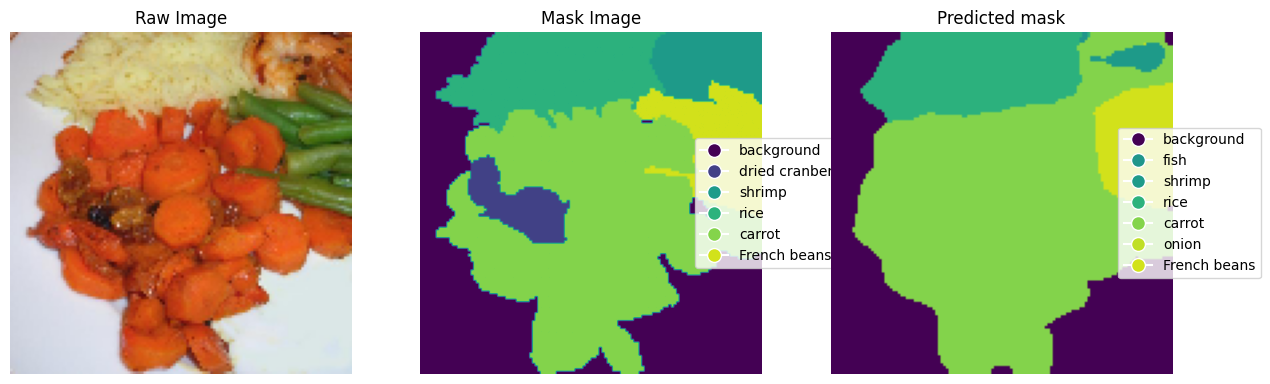

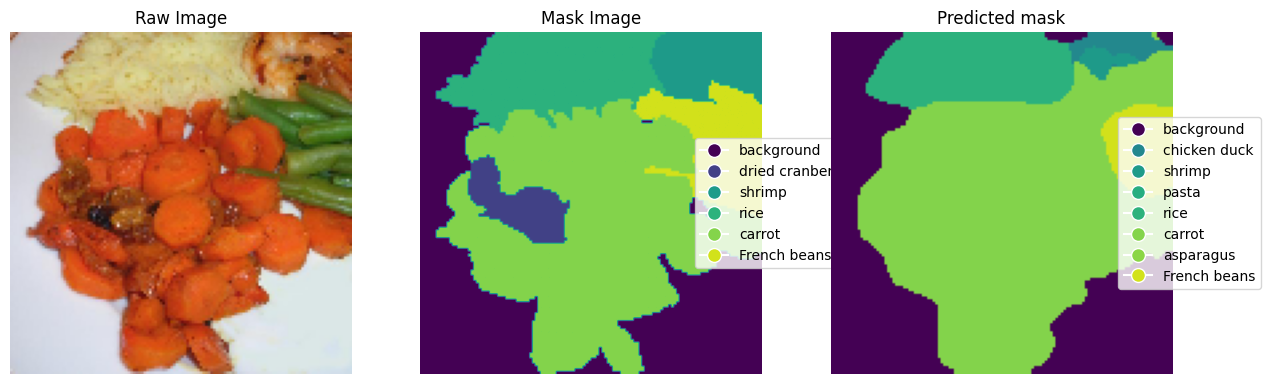

In [59]:
model_crossCategorical_noAug = load_model('history_crossCategorical_noAug.npy')
model_CategoricalFocal_noAug = load_model('history_CategoricalFocalCrossentropy_noAug.npy')

plot_images_withLegends(0, model_crossCategorical_noAug.model)
plot_images_withLegends(0, model_CategoricalFocal_noAug.model)